In [211]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat and a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
inputs

{'input_ids': tensor([[49406,   320,  1125,   539,   320,  2368,   537,   320,  1125,   539,
           320,  1929, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 0.5873,  0.5873,  0.6165,  ...,  0.0617,  0.0471, -0.0259],
          [ 0.5727,  0.5727,  0.6603,  ...,  0.1201,  0.0763,  0.0909],
          [ 0.5873,  0.5435,  0.6165,  ...,  0.0325,  0.1201,  0.0617],
          ...,
          [ 1.8719,  1.8573,  1.8719,  ...,  1.3902,  1.4340,  1.4194],
          [ 1.8281,  1.8719,  1.8427,  ...,  1.4486,  1.4340,  1.5070],
          [ 1.8573,  1.9011,  1.8281,  ...,  1.3756,  1.3610,  1.4486]],

         [[-1.3169, -1.3019, -1.3169,  ..., -1.4970, -1.4369, -1.4820],
          [-1.2418, -1.2718, -1.2268,  ..., -1.4369, -1.4669, -1.4519],
          [-1.2568, -1.3169, -1.2268,  ..., -1.4669, -1.4069, -1.4519],
          ...,
          [ 0.1239,  0.1089,  0.1239,  ..., -0.7016, -0.6865, -0.6865],
          [ 0.0789,  0.0939,  0.0488,

In [236]:
from PIL import Image
import requests
from transformers import AutoProcessor, FlaxCLIPVisionModel
from transformers import AutoTokenizer, FlaxCLIPModel

processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

images = processor(images=image, return_tensors="np")
texts = tokenizer(["a photo of a cat and a photo of a dog"], padding=True, return_tensors="np")
# outputs = model(**inputs)
# last_hidden_state = outputs.last_hidden_state
# pooler_output = outputs.pooler_output  # pooled CLS states

In [240]:
# images['pixel_values'].shape,texts['input_ids'].shape

import torch
dummy = {}
x1 = inputs['input_ids']
# x1 = torch.tensor(texts['input_ids'])
x = torch.ones(64).type(torch.int32).unsqueeze(dim=0)

y = torch.concat((x1,x*49407),dim=1)
dummy['input_ids']= y.type(torch.int32)
dummy['pixel_values'] = inputs['pixel_values']
# dummy['pixel_values'] = torch.tensor(images['pixel_values'])
outputs2 =model(**dummy)

logits_per_image2 = outputs2.logits_per_image  # this is the image-text similarity score
probs2 = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities


In [161]:
dummy = {}
x1 = inputs['input_ids']
x = torch.ones(64).type(torch.int64)
y = torch.concat((x1,x),dim=1)
dummy['input_ids']= 
dummy['pixel_values'] = inputs['pixel_values']
output =model(**dummy)

# output

In [144]:
import torch 
dict1 = {}
dict1['input_ids'] = inputs['input_ids'][0]
dict1['pixel_values'] = inputs['pixel_values']

dict2 = {}
x1 = inputs['input_ids'][0]
x = torch.zeros(70).type(torch.int64)
y = torch.concat((x1,x),dim=0)
dict2['input_ids'] = y
dict2['pixel_values'] = inputs['pixel_values']

In [153]:
outputs = model(**dict1)
# logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities


ValueError: Attention mask should be of size (1, 1, 7, 7), but is torch.Size([7, 1, 7, 7])

In [123]:
x = torch.zeros(70) 
xx =torch.concat((,x),dim=0)


torch.Size([20])

In [87]:
inputs

{'input_ids': tensor([[49406,   320,  1125,   539,   320,  2368, 49407],
        [49406,   320,  1125,   539,   320,  1929, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 0.5873,  0.5873,  0.6165,  ...,  0.0617,  0.0471, -0.0259],
          [ 0.5727,  0.5727,  0.6603,  ...,  0.1201,  0.0763,  0.0909],
          [ 0.5873,  0.5435,  0.6165,  ...,  0.0325,  0.1201,  0.0617],
          ...,
          [ 1.8719,  1.8573,  1.8719,  ...,  1.3902,  1.4340,  1.4194],
          [ 1.8281,  1.8719,  1.8427,  ...,  1.4486,  1.4340,  1.5070],
          [ 1.8573,  1.9011,  1.8281,  ...,  1.3756,  1.3610,  1.4486]],

         [[-1.3169, -1.3019, -1.3169,  ..., -1.4970, -1.4369, -1.4820],
          [-1.2418, -1.2718, -1.2268,  ..., -1.4369, -1.4669, -1.4519],
          [-1.2568, -1.3169, -1.2268,  ..., -1.4669, -1.4069, -1.4519],
          ...,
          [ 0.1239,  0.1089,  0.1239,  ..., -0.7016, -0.6865, -0.6865],
          [ 0.07

In [ ]:
# 최대 토큰 77 으로 고정.=> 만들어보쟈ㅏ.


# 77으로 만들어도 같은 값을 방출하는지.
# 

In [156]:
import torch
x1 = torch.ones(1,77)
x1 = x1.type(torch.int64)

dummy = {}

dummy['input_ids']= x1*49000
dummy['pixel_values'] = inputs['pixel_values']

output =model(**dummy)

In [154]:


dummy = {}

dummy['input_ids']= inputs['input_ids']
dummy['pixel_values'] = inputs['pixel_values']
output =model(**dummy)

output

CLIPOutput(loss=None, logits_per_image=tensor([[24.5701, 19.3049]], grad_fn=<TBackward0>), logits_per_text=tensor([[24.5701],
        [19.3049]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0148,  0.0070, -0.0234,  ..., -0.0508, -0.0438,  0.0033],
        [ 0.0087,  0.0258, -0.0387,  ..., -0.0547, -0.0242,  0.0112]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-9.7878e-03,  1.2770e-02, -2.7419e-02,  1.9675e-03, -5.9325e-03,
         -1.5613e-02, -1.2514e-02, -2.2666e-04,  4.3869e-02, -1.6322e-02,
          2.2630e-02, -3.5160e-02,  4.4747e-03, -1.2946e-02, -3.1524e-02,
         -1.1737e-02, -2.1543e-02, -2.7556e-02,  1.6562e-02,  4.5935e-03,
         -1.2106e-01, -3.0035e-03,  3.9024e-02, -3.0893e-02, -4.3865e-03,
          2.7598e-02,  2.2140e-02, -1.7064e-02,  1.4509e-02, -4.5196e-03,
         -7.1843e-03,  2.3971e-02, -6.8107e-03,  1.6382e-02, -5.3629e-02,
         -4.5555e-04,  2.5840e-02, -2.6581e-02,  1.7667e-02,  3.0217e-02,
         -9.3062e-03, -3.2082e-02,  6.6

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


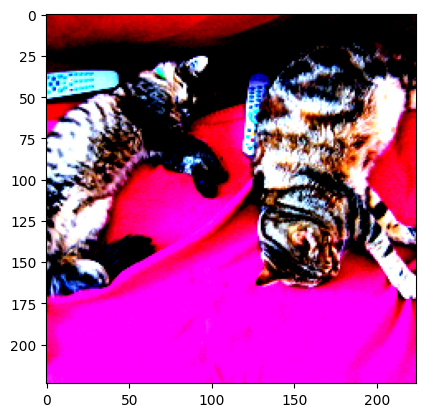

In [82]:
img1 = inputs.pixel_values

img1 = img1.squeeze().numpy()

img1 = img1.transpose(1,2,0)

import matplotlib.pyplot as plt 

plt.imshow(img1)

In [55]:
type(inputs)

transformers.tokenization_utils_base.BatchEncoding

In [35]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model00, preprocess = clip.load("ViT-B/32", device=device)
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = preprocess(Image.open(requests.get(url, stream=True).raw)).unsqueeze(0).to(device)
text = clip.tokenize(["a photo of a cat", "a photo of a dog"]).to(device)

with torch.no_grad():
    image_features = model00.encode_image(image)
    text_features = model00.encode_text(text)
    
    logits_per_image, logits_per_text = model00(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: [[0.994858   0.00514195]]


In [36]:
def print_trainable_parameters(model):
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param:.2f}"
    )
    return trainable_params, all_param

print('hugging face CLIP')
_,basic_model_params_num =  print_trainable_parameters(model)
print('Origin CLIP')
_,basic_model_params_num =  print_trainable_parameters(model00)

hugging face CLIP
trainable params: 151277313 || all params: 151277313 || trainable%: 100.00
Origin CLIP
trainable params: 151277313 || all params: 151277313 || trainable%: 100.00


In [39]:
from transformers import CLIPConfig, CLIPModel

# Initializing a CLIPConfig with openai/clip-vit-base-patch32 style configuration
configuration = CLIPConfig()

# Initializing a CLIPModel (with random weights) from the openai/clip-vit-base-patch32 style configuration
model = CLIPModel(configuration)

# Accessing the model configuration
configuration = model.config

# We can also initialize a CLIPConfig from a CLIPTextConfig and a CLIPVisionConfig
from transformers import CLIPTextConfig, CLIPVisionConfig

# Initializing a CLIPText and CLIPVision configuration
config_text = CLIPTextConfig()
config_vision = CLIPVisionConfig()

config = CLIPConfig.from_text_vision_configs(config_text, config_vision)

In [43]:
# config_text,config_vision

In [7]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=2,
    lora_alpha=16, # alpha/r 이다. 가중치 조정하는 하이퍼 파라미터라고 생각하면된다. 
    # 내생각에는 rank가 2처럼 작은경우 조금더 높은값으로 조정하기 위해있는게 아닐까 추측한다.
    
    # transformer의 clip에서는 아래와 같이 이름이 붙여져있다.
    target_modules=["q_proj", "v_proj","k_proj","out_proj"],
    lora_dropout=0.1,
    bias="none",
    modules_to_save=["encoder"],
)

lora_model = get_peft_model(model, config)
_,lora_model_params_num=print_trainable_parameters(lora_model)

print(lora_model_params_num/basic_model_params_num)

trainable params: 491520 || all params: 274651905 || trainable%: 0.18
1.0


In [54]:
for name,params in model00.named_parameters():
    print(name)
    print(params.shape)
    break


positional_embedding
torch.Size([77, 512])


In [49]:
# for named,params in lora_model.named_parameters():
#     if params.requires_grad==False:
#         print(named)

import loralib as lora
# This sets requires_grad to False for all parameters without the string "lora_" in their names
lora.mark_only_lora_as_trainable(lora_model)

for name,params in lora_model.named_parameters():
    if params.requires_grad==True:
        print(name)

base_model.model.text_model.encoder.original_module.layers.0.self_attn.k_proj.lora_A.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.k_proj.lora_B.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.v_proj.lora_A.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.v_proj.lora_B.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.q_proj.lora_A.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.q_proj.lora_B.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.out_proj.lora_A.default.weight
base_model.model.text_model.encoder.original_module.layers.0.self_attn.out_proj.lora_B.default.weight
base_model.model.text_model.encoder.original_module.layers.1.self_attn.k_proj.lora_A.default.weight
base_model.model.text_model.encoder.original_module.layers.1.self_attn.k_proj.lora_B.default.wei

In [9]:
_,lora_model_params_num=print_trainable_parameters(lora_model)

print(lora_model_params_num/basic_model_params_num)

#rank가 2일때는 491520
#rank가 4일때는 983040 딱 2배가 됩니다.

trainable params: 491520 || all params: 274651905 || trainable%: 0.18
1.0


In [11]:
# import jax
# from PIL import Image
# import requests
# from transformers import AutoProcessor, FlaxCLIPModel

# model = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(
#     text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="np", padding=True
# )

# outputs = model(**inputs)
# logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
# probs = jax.nn.softmax(logits_per_image, axis=1)  # we can take the softmax to get the label probabilities

In [110]:
from transformers import AutoTokenizer, FlaxCLIPModel

# model = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(["a photo of a cat and hello machine math hello my name is joonghun a photo of a dog"], padding=True, return_tensors="np")
# text_features = model.get_text_features(**inputs)
inputs['input_ids'].shape

(1, 24)

In [114]:
text = """팀 구성 안내
1. 팀 구성은 본 대회 시작일부터 11월 13일까지 가능

2. 팀원들의 제출 수의 합이 금일 기준 21 회(대회 경과일 7일 x 일일 최대 제출 수 3회) 이상인 경우 팀 병합 불가 (제출 수의 합이 초과된 경우 다음날 병합 가능)

3. 팀 구성 시 각 팀원은 적어도 1회 제출 기록이 있어야 함

4. 팀 구성 직후에는 팀원이 제출한 결과 중 가장 좋은 점수 공유

5. 리더만이 팀원 추가, 탈퇴 수락 및 거절, 결과물 제출 [최종 저장] 가능

6. 팀 구성 이후 1번 이상 제출이 발생 했다면, 팀 탈퇴 후 해당 대회 재참여가 불가능

7. 1번 이상 제출이 발생한 (2인 이상)팀에 합류하는 경우, 팀 탈퇴 시 재참여가 불가능

8. 리더는 다른 팀원의 탈퇴 요청이 있을 때 팀 탈퇴나 리더 위임 불가능

팀 구성 FAQ
1. 동일인이 복수팀으로 등록할 수 있나요?
2. 리더만이 제출 가능한가요?
3. 리더 변경은 어떻게 하나요?
4. 1일 제출 제한은 어떻게 적용되나요?
5. 상금 수령 시 누가 받게 되나요?
6. 팀 간의 협력이 허용되나요?
7. 팀 탈퇴는 어떻게 하나요?
Dacon logo
Kakao logo
Discord logo
LinkedIn logo
YouTube logo
Facebook logo
AI 해커톤 플랫폼
대회 주최 문의
교육 문의
데이콘 서비스 소개
데이콘 채용
데이콘(주) | 대표 김국진 | 699-81-01021
통신판매업 신고번호: 제 2021-서울영등포-1704호
서울특별시 영등포구 은행로 3 익스콘벤처타워 901호
이메일 dacon@dacon.io | 전화번호: 070-4151-0545
Copyright ⓒ DACON Inc. All rights reserved
"""


from transformers import AutoTokenizer, FlaxCLIPModel

# model = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer([text], padding=True, return_tensors="np")
# text_features = model.get_text_features(**inputs)
inputs['input_ids'].shape

# model(**inputs)

Token indices sequence length is longer than the specified maximum sequence length for this model (1010 > 77). Running this sequence through the model will result in indexing errors


(1, 1010)

In [12]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

text =["개와 닮은 동물 3마리가 침대에 누워있다","강아지 사진","고양이가 뛰어 노는 사진", "강아지가 누워있는 사진","코끼리 동물원에서 사진찍음"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
probs

tensor([[0.1704, 0.5418, 0.0472, 0.1541, 0.0866]], grad_fn=<SoftmaxBackward0>)

In [19]:
text =["Three dog-like animals lying on the bed", "Puppy picture", "Photograph of cat running", "Puppy lying down", "Photograph taken at the elephant zoo"]
inputs = processor(text=text, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
probs

tensor([[0.8602, 0.0012, 0.1170, 0.0043, 0.0173]], grad_fn=<SoftmaxBackward0>)

In [39]:
batch_size = 16
h1 = torch.randn(batch_size,512)
alignment = -torch.log(F.cosine_similarity(h1[1,:],h1[2,:],dim=0))

alignment

tensor(2.9725)

In [45]:
anisotropyj = torch.tensor([0.])
anisotropyj.dtype

torch.float32

In [59]:
a= torch.tensor([[1,0],[-1,1]]).type(torch.float32)
b = a
F.cosine_similarity(a[:,0],b[:,1],dim=0)

tensor(-0.7071)

In [27]:
loss = -torch.log(alignment/uniformity)

tensor([2.0803, 2.0796, 2.0728, 2.0717])

In [28]:
norm_hi = torch.sqrt(torch.sum(torch.square(h[:, 0, :]), dim=1))
norm_hj_plus = torch.sqrt(torch.sum(torch.square(h[:, 1, :]), dim=1))
norm_hj_minus = torch.sqrt(torch.sum(torch.square(h[:, 2, :]), dim=1))

sim_denom1 = torch.outer(norm_hi, norm_hj_plus) * temp
sim_denom2 = torch.outer(norm_hi, norm_hj_minus) * temp

v1 = h[:, 0, :] @ h[:, 1, :].t() / sim_denom1
v2 = h[:, 0, :] @ h[:, 2, :].t() / sim_denom2

vec_denom = torch.sum(torch.exp(v1) + torch.exp(v2), dim=1)

